## Networks of queues

### Burke's Theorem

Consider an M/M/1 system with arrival rate $\lambda$. Suppose the system starts with a steady state. Then following are true:
1. The departure process is Poisson($\lambda$)
2. At each time t, the number of jobs in the system at time t is independent of the sequence of departure time prior to time t.

### Example: Tamdem Servers

Utilizations are: $\rho_1 = \frac{\lambda}{\mu_1}$, $\rho_2 = \frac{\lambda}{\mu_2}$
Expected number jobs in system: $E[N] = E[N_1] +  E[N_2] = \frac{\rho_1}{1 - \rho_1} + \frac{\rho_2}{1-\rho_2}$.
According Burke's theorem departures from first queue is independent from $N_2(t)$, $N_1(t)$ is idependent from $N_2(t)$

In [30]:
from graphviz import Digraph

def make_graph(nodes):
    dot = Digraph(graph_attr={"rankdir": "LR"})
    dot.node(name="input", label="Poisson(&lambda;)", shape="box", color="blue")
    dot.node(name="out", label="Out", shape="box", color="blue")
    for name,label in nodes.items():
        dot.node(name=name, label=label)
    return dot

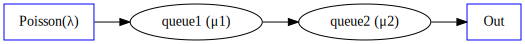

In [31]:
dot = make_graph({"q1": "queue1 (&mu;1)", "q2": "queue2 (&mu;2)"})
dot.edge("input", "q1")
dot.edge("q1", "q2")
dot.edge("q2", "out")

dot

## Jackson networks

Network of queues with feedback.

Jackson network with k servers has product form, namely,
$$P(n_1\text{ jobs on Server1}, \dots, n_k\text{ jobs on server k}) = \prod_{i=1}^k{\rho_i^{n_i}(1 - \rho_i)}$$

Arrival process into each server is not usually a Poisson process, but all servers still behave like M/M/1 queues in term of their stationary queue length distribution.

### Example: Web server

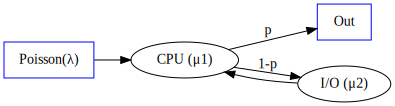

In [32]:
dot = make_graph({"cpu": "CPU (&mu;1)", "io": "I/O (&mu;2)"})
dot.edge("input", "cpu")
dot.edge("cpu", "out", label="p")
dot.edge("cpu", "io", label="1-p")
dot.edge("io", "cpu")

dot

Solve $\lambda_1$ and $\lambda_2$: $\lambda_1 = \lambda + \lambda_2$, $\lambda_2 = (1 - p)\lambda_1 $
$$\lambda_1 = \frac{\lambda}{p},\text{  }\lambda_2 = \frac{\lambda}{p}(1 - p)$$
$$\rho_1 = \frac{\lambda_1}{\mu_1} = \frac{\lambda}{p\mu_1}$$
$$\rho_2 = \frac{\lambda_2}{\mu_2} = \frac{\lambda(1-p)}{p\mu_2}$$

Expected number of jobs in system: $E[N]= E[N_1] + E[N_2]$

## Classed Network of queues

1. The outside arrival rate at server i, $r_i(c)$, should depend on the job class c
2. The routing probabilities for moving from server i to server j should be allowed to depend on the job class c
3. Jobs should be allowed to change classes after service

 ### Example: Connection-Oriented ATM network example

There are four routes throw the network with for nodes.

* Route 1 (3pkts/sec) - Nodes: 1 - 2 - 3
* Route 2 (4pkts/sec) - Nodes: 1 - 3 - 4
* Route 3 (5pkts/sec) - Nodes: 2 - 3 - 4
* Route 4 (6pkts/sec) - Nodes: 3

Service rates: $\mu_1=10$, $\mu_2=10$, $\mu_3=20$, $\mu_4=10$ 

Legend:
* $r_i(c)$ = outside arrival rate into server i of class c packets
* $P_{ij}^{(c)}$ = probability that when packet of class c finishes at server i, it next moves to server j
* $\lambda_i(c)$ = total arrival rate into server i of class c packets

Input parameters:
$$r_1(1)=3; P_{12}^1=1; P_{23}^1=1; P_{3,out}^1=1;$$
$$\dots$$
$$r_3(4)=6; P_{3,out}^4=1;$$

Calculate lambdas: $$\lambda_j(c) = r_j(c) + \sum_i{\lambda_i(c)P_{ij}^c}$$
$$\lambda_3(1) = \lambda_2(1) = \lambda_1(1) = r_1(1) = 3\text{ jobs/sec}$$
$$\dots$$
$$\lambda_3(4) = r_3(4) = 6\text{ jobs/sec}$$

Total arrival rate to server i: $$\lambda_j = \sum_{c=1}^l{\lambda_j(c)}$$
$$\lambda_1 = \lambda_1(1) + \lambda_1(2) = 3 + 4 = 7\text{ jobs/sec}$$
$$\dots$$
$$\lambda_4 = \lambda_4(2) + \lambda_4(3) = 4 + 5 = 9\text{ jobs/sec}$$

Utilization of server i: $$\rho_i = \frac{\lambda_i}{\mu_i}$$
$$\rho_1=\frac{7}{10},\dots,\rho_4=\frac{9}{10}$$

E[T for route 2 packets]:
$$E[N_i] = \frac{\rho_i}{1-\rho_i}$$
$$E[N_1] = \frac{0.7}{0.3} = \frac{7}{3};\dots;E[N_4]=9$$


$$E[T_i] = \frac{E[N_i]}{\lambda_i}$$
$$E[T_1] = 1/3 sec,\dots,E[T_4]=1 sec$$

E[T for route 2 packets] = $E[T_1] + E[T_3] + E[T_4] = 11/6 sec$



### Example: Distribution of job classes

$$P(\text{Server i has s jobs of class 1 and t jobs of class 2}) = \binom{s+t}{s}\frac{\lambda_i(1)^s\lambda_i(2)^t}{\mu_i^{s+t}}\dot(1-\rho_i)$$

Let define $p = \frac{\lambda_i(1)}{\lambda_i(1) + \lambda_i(2)}$ - fraction of type 1 arrivals at server i.
Then we can rewrite previous formula as: $$\binom{s+t}{s}p^s(1-p)^t$$.



### Example: CPU-bound and I/O-bound jobs

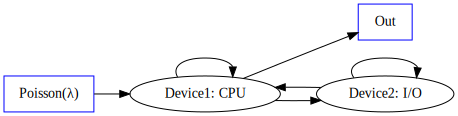

In [35]:
dot = make_graph({"cpu": "Device1: CPU", "io": "Device2: I/O"})
dot.edge("input", "cpu")
dot.edge("cpu", "io")
dot.edge("cpu", "out")
dot.edge("cpu", "cpu")
dot.edge("io", "cpu")
dot.edge("io", "io")

dot

CPU-bound jobs arrive at CPU from outside according to Poisson process of rate 0.2 jobs/sec. Then:
1. With probability 0.3 job leaves system
2. With probability 0.65 job returns to cpu
3. With probability 0.05 job goes to I/O device queue, serves there once and immediately returns to the CPU queue to repeat th process

I/O-bound jobs arrive at the I/O from outside according to Poisson process of rate 0.25 jobs/sec. Then:
1. With probability 0.4 job leaves system
2. With probability 0.5 jobs returns to I/O queue to repeat the process
3. With probability 0.1 job goes to CPU device queue. Each tim the job servces at the CPU device it has 0.05 probability of returning to CPU device and 0.95 probability of returning to the I/O queue

Calculate input rates for various classess:
$$\lambda_1^C=r_1^C + \lambda_1^C\dot P_{1,1}^C + \lambda_2^C\dot P_{2,1}^C=0.2 + 0.65\lambda_1^C + \lambda_2^C$$
$$\lambda_2^C=r_1^C+\lambda_2^C\dot P_{2,2}^C + \lambda_1^C\dot P_{1,2}^C=0.05\lambda_1^C$$
$$\lambda_1^C=2/3, \lambda_2^C=1/30$$

Similarly for I/O bound jobs:
$$\lambda_1^I=5/75, \lambda_2^I=5/8$$

Calculate input rates and utilization for entire server:
$$\lambda_1=\lambda_1^C+\lambda_1^I=0.7325$$
$$\rho_1=\frac{\lambda_1}{\mu_1}=0.3663$$
$$E[N_1]=\frac{\rho_1}{1-\rho_1}=0.578$$
$$E[T_1]=\frac{E[N_1]}{\lambda_1}=0.7895$$

Same for second server...

Calculate expected time in system of CPU-bound jobs
$$E[T^C]=0.3E[T|\text{leaves after visiting 1}] + 0.65E[T|\text{loops back to 1}] + 0.05E[T|\text{loops back via 1 and 2}]$$
$$E[T^C]=0.3E[T_1]+0.65(E[T_1]+E[T^C]) + 0.05(E[T_1]+ E[T_2] + E[T^C]$$
$$E[T^C]=3.117$$

Calculate average number of CPU-bound jobs at the CPU
$$E[N_1^C]=E[N_1] * p = \frac{\rho_1}{1-\rho_1} * \frac{\lambda_1^C}{\lambda_1^C + \lambda_1^I}$$